In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#pd.set_option("display.max_columns",100)
#pd.set_option("display.max_rows",100)

df = pd.read_csv('employee_satisfaction.csv')

<Figure size 432x288 with 0 Axes>

In [2]:
df.head(100)

,ID,location,gender,age_category,seniority_category,satisfaction_score,#contact_acct,rating_acct,#contact_HR,rating_HR,#contact_OM,rating_OM,rating_security,rating_D&R
0,1,Boston,Female,2.0,3.0,8.0,1 to 2 times,3.0,3 to 4 times,6.0,1 to 2 times,1.0,4.0,NaN
1,2,Amsterdam,Male,3.0,3.0,10.0,0 times,NaN,1 to 2 times,7.0,5 times or more,10.0,9.0,8.0
2,3,New Dehli,Female,1.0,3.0,8.0,1 to 2 times,8.0,0 times,NaN,5 times or more,10.0,8.0,NaN
3,4,New Dehli,Female,1.0,1.0,7.0,5 times or more,9.0,1 to 2 times,7.0,1 to 2 times,9.0,NaN,NaN
4,5,New Dehli,Female,3.0,4.0,5.0,3 to 4 times,9.0,3 to 4 times,8.0,1 to 2 times,8.0,9.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Amsterdam,Male,2.0,1.0,6.0,3 to 4 times,5.0,3 to 4 times,9.0,5 times or more,6.0,9.0,NaN
96,97,Boston,Female,1.0,2.0,9.0,3 to 4 times,10.0,0 times,10.0,1 to 2 times,8.0,10.0,NaN
97,98,Boston,Male,2.0,2.0,5.0,3 to 4 times,7.0,5 times or more,6.0,5 times or more,6.0,5.0,9.0
98,99,Boston,Male,2.0,2.0,9.0,3 to 4 times,9.0,3 to 4 times,9.0,1 to 2 times,9.0,9.0,8.0


In [3]:
df.shape

(182, 14)

create copies of '#contact' columns and fill them with dummy values to be able to include them in correlation:

In [4]:
df['#contact_acct_copy'] = df['#contact_acct']
df['#contact_HR_copy'] = df['#contact_HR']
df['#contact_OM_copy'] = df['#contact_OM']

In [5]:
df = df.replace({"#contact_acct_copy" : {"0 times" : 1, "1 to 2 times" : 2, "3 to 4 times" : 3, "5 times or more" : 4},
                 "#contact_HR_copy" : {"0 times" : 1, "1 to 2 times" : 2, "3 to 4 times" : 3, "5 times or more" : 4},
                 "#contact_OM_copy" : {"0 times" : 1, "1 to 2 times" : 2, "3 to 4 times" : 3, "5 times or more" : 4}})

In [6]:
df.head()

,ID,location,gender,age_category,seniority_category,satisfaction_score,#contact_acct,rating_acct,#contact_HR,rating_HR,#contact_OM,rating_OM,rating_security,rating_D&R,#contact_acct_copy,#contact_HR_copy,#contact_OM_copy
0,1,Boston,Female,2.0,3.0,8.0,1 to 2 times,3.0,3 to 4 times,6.0,1 to 2 times,1.0,4.0,NaN,2,3,2
1,2,Amsterdam,Male,3.0,3.0,10.0,0 times,NaN,1 to 2 times,7.0,5 times or more,10.0,9.0,8.0,1,2,4
2,3,New Dehli,Female,1.0,3.0,8.0,1 to 2 times,8.0,0 times,NaN,5 times or more,10.0,8.0,NaN,2,1,4
3,4,New Dehli,Female,1.0,1.0,7.0,5 times or more,9.0,1 to 2 times,7.0,1 to 2 times,9.0,NaN,NaN,4,2,2
4,5,New Dehli,Female,3.0,4.0,5.0,3 to 4 times,9.0,3 to 4 times,8.0,1 to 2 times,8.0,9.0,NaN,3,3,2


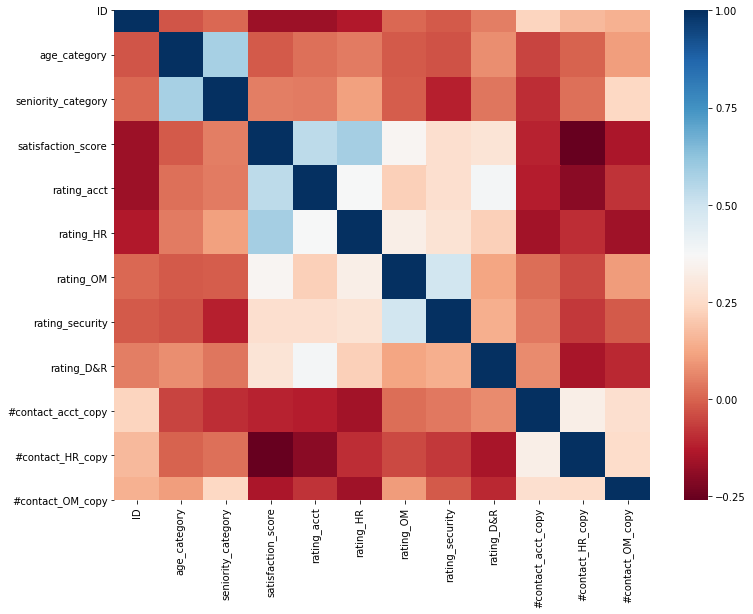

In [7]:
df_corr = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(df_corr, vmax=1, cmap="RdBu");

In [8]:
df_copy = df.copy()

In [9]:
df_corr_sat = df_copy.corrwith(df['satisfaction_score'])

In [10]:
df_corr_sat.sort_values(ascending=False)

satisfaction_score    1.000000
rating_HR             0.582954
rating_acct           0.537422
rating_OM             0.358173
rating_D&R            0.283559
rating_security       0.266509
seniority_category    0.049525
age_category         -0.015983
#contact_acct_copy   -0.115099
#contact_OM_copy     -0.144951
ID                   -0.169644
#contact_HR_copy     -0.258435
dtype: float64

In [11]:
df_copy.isnull().sum()

ID                      0
location                0
gender                  0
age_category            0
seniority_category      0
satisfaction_score      2
#contact_acct           0
rating_acct            10
#contact_HR             0
rating_HR              14
#contact_OM             0
rating_OM              14
rating_security         9
rating_D&R            118
#contact_acct_copy      0
#contact_HR_copy        0
#contact_OM_copy        0
dtype: int64

In [12]:
df_copy.drop(['rating_D&R'], axis=1)

,ID,location,gender,age_category,seniority_category,satisfaction_score,#contact_acct,rating_acct,#contact_HR,rating_HR,#contact_OM,rating_OM,rating_security,#contact_acct_copy,#contact_HR_copy,#contact_OM_copy
0,1,Boston,Female,2.0,3.0,8.0,1 to 2 times,3.0,3 to 4 times,6.0,1 to 2 times,1.0,4.0,2,3,2
1,2,Amsterdam,Male,3.0,3.0,10.0,0 times,NaN,1 to 2 times,7.0,5 times or more,10.0,9.0,1,2,4
2,3,New Dehli,Female,1.0,3.0,8.0,1 to 2 times,8.0,0 times,NaN,5 times or more,10.0,8.0,2,1,4
3,4,New Dehli,Female,1.0,1.0,7.0,5 times or more,9.0,1 to 2 times,7.0,1 to 2 times,9.0,NaN,4,2,2
4,5,New Dehli,Female,3.0,4.0,5.0,3 to 4 times,9.0,3 to 4 times,8.0,1 to 2 times,8.0,9.0,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,178,Boston,Male,3.0,3.0,9.0,3 to 4 times,10.0,1 to 2 times,10.0,1 to 2 times,9.0,10.0,3,2,2
178,179,Amsterdam,Male,2.0,3.0,10.0,3 to 4 times,10.0,5 times or more,8.0,5 times or more,10.0,10.0,3,4,4
179,180,Boston,Female,2.0,4.0,8.0,1 to 2 times,10.0,3 to 4 times,10.0,3 to 4 times,10.0,NaN,2,3,3
180,181,Boston,Female,2.0,3.0,8.0,1 to 2 times,10.0,1 to 2 times,9.0,1 to 2 times,10.0,10.0,2,2,2


In [13]:
df_copy = df_copy.dropna()

take a closer look at correlation between 'satisfaction_score' and 'rating_HR' as well as 'rating_acct':

In [14]:
# add constant column to df_copy:

df_copy = sm.add_constant(df_copy)

# run OLS on 'satisfaction_score':

sat_score = sm.OLS(df_copy["satisfaction_score"],
                   df_copy[["const",
                            "rating_HR",
                            "rating_acct",
                            "rating_OM",
                            "#contact_OM_copy"]]).fit()

print('Parameters:' ,"\n", sat_score.params, "\n")

print('R2: ', sat_score.rsquared)

Parameters: 
 const              -0.482494
rating_HR           0.458077
rating_acct         0.293074
rating_OM           0.277812
#contact_OM_copy   -0.077719
dtype: float64 

R2:  0.5869107276648253


C:\Users\Lena\Miniconda3\envs\labs\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [15]:
sat_score.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     satisfaction_score   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     17.40
Date:                Thu, 21 Nov 2019   Prob (F-statistic):           6.03e-09
Time:                        12:01:09   Log-Likelihood:                -83.170
No. Observations:                  54   AIC:                             176.3
Df Residuals:                      49   BIC:                             186.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.4825      1.454     -0.332      0.741      -3.403       2.438
rating_HR            0.4581      0.128      3.572      0.001       0.200       0.716
rating_acct          0.2931      0.105      2.803      0.007       0.083       0.503
rating_OM            0.2778      0.134      2.067      0.044       0.008       0.548
#contact_OM_copy    -0.0777      0.239     -0.325      0.747      -0.559       0.404
==============================================================================
Omnibus:                        1.660   Durbin-Watson:                   2.335
Prob(Omnibus):                  0.436   Jarque-Bera (JB):                0.882
Skew:                           0.125   Prob(JB):                        0.643
Kurtosis:                       3.575   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**For 3 out of 4 variables, there is enough statistical evidence to reject the null hypothesis,
as their p-value is below 5%.**

    For:

    • Human Resources Rating ("rating_HR"),
    • Accounting Rating ("rating_acct"),
    • Office Management Rating ("rating_OM")

    there is statistically enough evidence that they are related to the satisfaction score.
    
    -----------------------------------------------------------------------------------------

    For:

    • The number of times employees contacted the Office Management("#contact_OM_copy")

    there is statistically not enough evidence that it is related to the satisfaction score.

# Barplot: Accounting Department

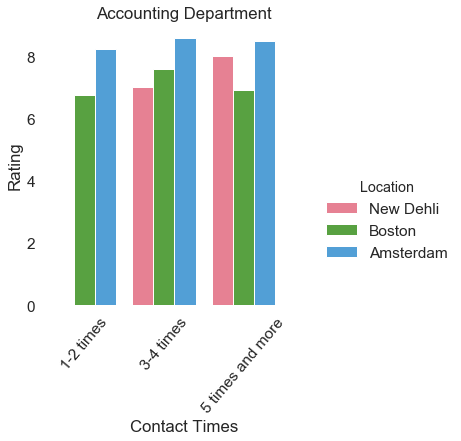

In [21]:
accounting = sns.catplot(x='#contact_acct_copy', y='rating_acct',hue="location", kind= "bar", data=df_copy, palette=("husl"), ci=None)

sns.set_style("white")
sns.set(font_scale=1.4)

plt.xticks([0,1,2,3])
accounting.set_xticklabels(['1-2 times','3-4 times','5 times and more'],rotation=50)
plt.title('Accounting Department')
plt.xlabel('Contact Times')
plt.ylabel('Rating')
accounting._legend.set_title("Location")
sns.despine(left=True, bottom=True);

# Barplot: HR Department

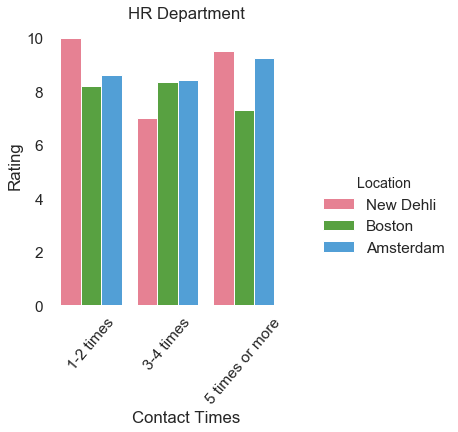

In [23]:
hr = sns.catplot(x='#contact_HR_copy', y='rating_HR',hue="location", kind= "bar", data=df_copy, palette=("husl"), ci=None)

plt.xticks([0,1,2,3,4])
hr.set_xticklabels(['0 times','1-2 times','3-4 times','5 times or more'],rotation=50)
plt.xlim(0.5, 4)
plt.title('HR Department')
plt.xlabel('Contact Times')
plt.ylabel('Rating')
hr._legend.set_title("Location")
sns.despine(left=True, bottom=True)
sns.set_style("white");

In [18]:
df_copy['#contact_OM_copy'].value_counts()

4    35
3    11
2     8
Name: #contact_OM_copy, dtype: int64

# Barplot: Office Management Department

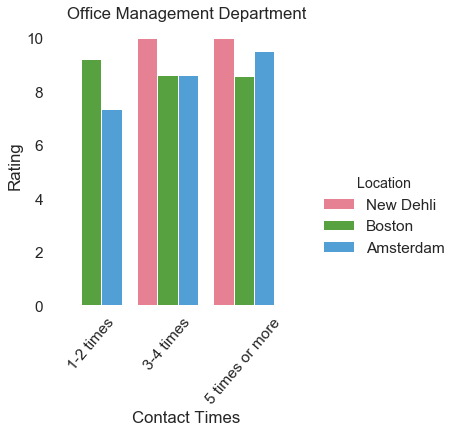

In [25]:
om = sns.catplot(x='#contact_OM_copy', y='rating_OM', hue="location", kind= "bar", data=df_copy, palette=("husl"),ci=None)

plt.xticks([0,1,2,3])
om.set_xticklabels(['1-2 times','3-4 times','5 times or more'],rotation=50)
plt.title('Office Management Department')
plt.xlabel('Contact Times')
plt.ylabel('Rating')
om._legend.set_title("Location")
sns.despine(left=True, bottom=True)
sns.set_style("white");

# Barplot: Satisfaction by Gender & Location

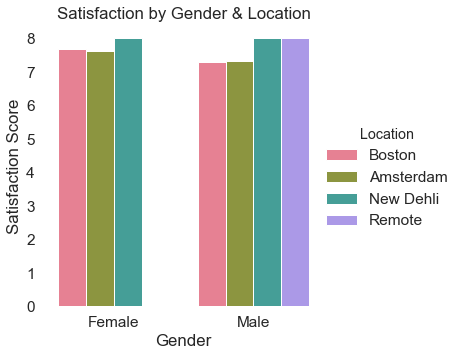

In [26]:
sat_gender_loc = sns.catplot(x="gender", y="satisfaction_score", hue="location", kind="bar", data=df, palette=("husl"), ci=None)

plt.title('Satisfaction by Gender & Location')
plt.xlabel('Gender')
plt.ylabel('Satisfaction Score')
sat_gender_loc._legend.set_title("Location")
sns.despine(left=True, bottom=True)
sns.set_style("white");